In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
x = tf.Variable(3, name='x')
y = tf.Variable(4, name='y')
f = x * x * y + y + 2

In [3]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [4]:
sess.close()

In [5]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [6]:
print(result)

42


In [7]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    result = f.eval()

In [8]:
print(result)

42


In [9]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    print(x.eval())
    print(y.eval())
    result = sess.run(f, feed_dict={x:1, y:0})

3
4


In [10]:
print(result)

2


### 用tensorflow 来实现linear regression

In [11]:

def plot_decision_boundary(X, model):
    h = .02 

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


def f(X):
    """
    input: x
    output: y = 3x + 4
    """
    return 3*X + 4




In [12]:
N = 40
noise_level = 0.8
trainX = np.linspace(-4.0, 4.0, N)
np.random.shuffle(trainX)
trainY = f(trainX) + np.random.randn(N) * noise_level


learning_rate = 0.01
training_epochs = 1000
display_step = 50

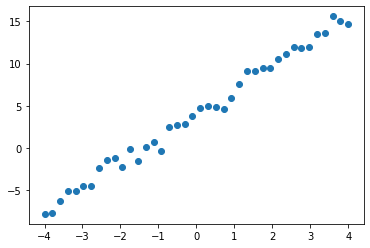

In [13]:
plt.scatter(trainX, trainY)

In [14]:
from sklearn.base import BaseEstimator

In [15]:
class LinearRegressionTF(BaseEstimator):
    def __init__(self, learning_rate, training_epochs, display_step, annotate=False):
        self.annotate = annotate
        self.sess = tf.Session()
        self.training_epochs = training_epochs
        self.learning_rate = learning_rate
        self.display_step = display_step
        
        
    def fit(self, trainX,trainY):
        N = trainX.shape[0]
        # 图的输入
        self.X = tf.placeholder("float")
        self.Y = tf.placeholder("float")
        
        
        # 参数的定义
        self.W = tf.Variable(np.random.randn(), name="weight")
        self.b = tf.Variable(np.random.randn(), name="bias")
        
        # 线性模型
        self.pred = tf.add(tf.multiply(self.X, self.W), self.b)
        
        # mean squre error
        cost = tf.reduce_sum(tf.pow(self.pred-self.Y, 2))/(2*N)
        
        # 优化器
        optimizer = tf.train.GradientDescentOptimizer(self.learning_rate).minimize(cost)
        
        # 初始化所有的参数
        init = tf.global_variables_initializer()
        self.sess.run(init)

        
        if self.annotate:
            plt.plot(trainX, trainY, 'ro', label='Original data')
            plt.plot(trainX, self.sess.run(self.W) * trainX + self.sess.run(self.b), label='Fitted line')
            plt.legend()
            plt.title("This is where model starts to learn!!")
            plt.show()
            
        # 训练开始
        for epoch in range(self.training_epochs):
            for (x, y) in zip(trainX, trainY):
                self.sess.run(optimizer, feed_dict={self.X: x, self.Y: y})

            #展示训练结果
            if (epoch+1) % display_step == 0:
                c = self.sess.run(cost, feed_dict={self.X: trainX, self.Y:trainY})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", self.sess.run(self.W), "b=", self.sess.run(self.b))
                
            #显示拟合的直线
                if self.annotate:
                    plt.plot(trainX, trainY, 'ro', label='Original data')
                    plt.plot(trainX, self.sess.run(self.W) * trainX + self.sess.run(self.b), label='Fitted line')
                    plt.legend()
                    plt.show()
                #plt.pause(0.5)

        print("Optimization Finished!")
        training_cost = self.sess.run(cost, feed_dict={self.X: trainX, self.Y: trainY})
        print("Training cost=", training_cost, "W=", self.sess.run(self.W), "b=", self.sess.run(self.b), '\n')

        
    def predict(self, testX):
        prediction = self.sess.run(self.pred,feed_dict={self.X: testX})
        return prediction
    
    def score(self, testX, testY):
        result = self.predict(testX)
        return r2_score(testY, result)
        
    

In [16]:
lr = LinearRegressionTF(learning_rate, 1000, display_step, annotate=False)
lr.fit(trainX, trainY)

W0927 12:52:36.500895 4712420800 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch: 0050 cost= 3.180847645 W= 2.7429051 b= 1.6668977
Epoch: 0100 cost= 1.303128004 W= 2.8841796 b= 2.609979
Epoch: 0150 cost= 0.636204183 W= 2.8928943 b= 3.1817234
Epoch: 0200 cost= 0.391198009 W= 2.8935378 b= 3.5283554
Epoch: 0250 cost= 0.301161677 W= 2.893645 b= 3.738517
Epoch: 0300 cost= 0.268081129 W= 2.8936927 b= 3.8659334
Epoch: 0350 cost= 0.255930573 W= 2.8937237 b= 3.9431813
Epoch: 0400 cost= 0.251469493 W= 2.8937385 b= 3.990016
Epoch: 0450 cost= 0.249832973 W= 2.8937492 b= 4.0184093
Epoch: 0500 cost= 0.249233201 W= 2.8937578 b= 4.035629
Epoch: 0550 cost= 0.249014005 W= 2.893759 b= 4.046065
Epoch: 0600 cost= 0.248934150 W= 2.8937635 b= 4.0523925
Epoch: 0650 cost= 0.248905227 W= 2.89376 b= 4.056229
Epoch: 0700 cost= 0.248894885 W= 2.8937674 b= 4.0585475
Epoch: 0750 cost= 0.248891160 W= 2.8937654 b= 4.0599656
Epoch: 0800 cost= 0.248889953 W= 2.8937683 b= 4.0608015
Epoch: 0850 cost= 0.248889491 W= 2.8937652 b= 4.0613465
Epoch: 0900 cost= 0.248889402 W= 2.8937728 b= 4.0616717
Ep

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, trainX, trainY, cv=5).mean()

Epoch: 0050 cost= 4.873595238 W= 2.7692037 b= 1.0892793
Epoch: 0100 cost= 1.940061927 W= 2.875989 b= 2.2811105
Epoch: 0150 cost= 0.874667764 W= 2.8841825 b= 3.0038316
Epoch: 0200 cost= 0.483169407 W= 2.8862658 b= 3.4419742
Epoch: 0250 cost= 0.339293420 W= 2.887381 b= 3.7075853
Epoch: 0300 cost= 0.286417842 W= 2.8880477 b= 3.8686073
Epoch: 0350 cost= 0.266985834 W= 2.888452 b= 3.9662247
Epoch: 0400 cost= 0.259844720 W= 2.888699 b= 4.025405
Epoch: 0450 cost= 0.257220745 W= 2.8888474 b= 4.0612783
Epoch: 0500 cost= 0.256256580 W= 2.888936 b= 4.0830264
Epoch: 0550 cost= 0.255902439 W= 2.8889914 b= 4.096208
Epoch: 0600 cost= 0.255772293 W= 2.889024 b= 4.104197
Epoch: 0650 cost= 0.255724400 W= 2.889046 b= 4.109045
Epoch: 0700 cost= 0.255706817 W= 2.8890557 b= 4.1119814
Epoch: 0750 cost= 0.255700469 W= 2.8890638 b= 4.113762
Epoch: 0800 cost= 0.255698025 W= 2.889075 b= 4.1148405
Epoch: 0850 cost= 0.255697191 W= 2.8890755 b= 4.115502
Epoch: 0900 cost= 0.255696833 W= 2.8890753 b= 4.1158967
Epoch:

0.9869948002671818

### 用tensorflow 来实现logistic regression

In [18]:
tf.reset_default_graph()

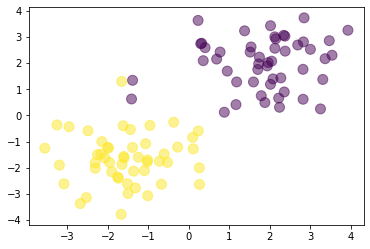

In [19]:
N = 100
D = 2
trainX = np.random.randn(N, D)

delta = 1.75
trainX[:N//2] += np.array([delta, delta])
trainX[N//2:] += np.array([-delta, -delta])

trainY = np.array([0] * (N//2) + [1] * (N//2))
plt.scatter(trainX[:,0], trainX[:,1], s=100, c=trainY, alpha=0.5)
plt.show()

In [20]:
original_label = np.array([0] * (N//2) + [1] * (N//2))

In [21]:
from sklearn.metrics import accuracy_score
class LogisticRegressionTF(BaseEstimator):
    def __init__(self, learning_rate, training_epochs, display_step, annotate=False):
        self.annotate = annotate
        self.sess = tf.Session()
        self.training_epochs = training_epochs
        self.learning_rate = learning_rate
        self.display_step = display_step
        
        
    def fit(self, trainX,trainY):
        N, D = trainX.shape
        _, c = trainY.shape
        # 图的输入
        self.X = tf.placeholder(tf.float64, shape=[None, D])
        self.Y = tf.placeholder(tf.float64, shape=[None, c])
        
        
        # 参数的定义
        self.W = tf.Variable(np.random.randn(D,c), name="weight")
        self.b = tf.Variable(np.random.randn(c), name="bias")
        
        # logistic prediction
        #self.pred = tf.sigmoid(tf.add(tf.matmul(self.X, self.W), self.b))
        output_logits = tf.add(tf.matmul(self.X, self.W), self.b)
        self.pred = tf.sigmoid(output_logits)   # turn logits to probability
        
        # 交叉熵loss
        #cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
        cost= tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output_logits, labels=self.Y))
        
        # 优化器
        optimizer = tf.train.GradientDescentOptimizer(self.learning_rate).minimize(cost)
        
        # 初始化所有的参数
        init = tf.global_variables_initializer()
        self.sess.run(init)
        
        
        # 可视化初始化的模型边界
        if self.annotate:
            assert len(trainX.shape) == 2, "Only 2d points are allowed!!"

            plt.scatter(trainX[:,0], trainX[:,1], s=100, c=original_label, alpha=0.5) 

            h = .02 
            x_min, x_max = trainX[:, 0].min() - 1, trainX[:, 0].max() + 1
            y_min, y_max = trainX[:, 1].min() - 1, trainX[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

            Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
            plt.title("This is where model starts to learn!!")
            plt.show()

        

        # 训练开始
        for epoch in range(self.training_epochs):
            for (x, y) in zip(trainX, trainY):
                self.sess.run(optimizer, feed_dict={self.X: np.asmatrix(x), self.Y: np.asmatrix(y)})

            #展示训练结果
            if (epoch+1) % display_step == 0:
                c = self.sess.run(cost, feed_dict={self.X: trainX, self.Y:trainY})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", self.sess.run(self.W), "b=", self.sess.run(self.b))
                
            #显示拟合的直线
                if self.annotate:
                    assert len(trainX.shape) == 2, "Only 2d points are allowed!!"

                    plt.scatter(trainX[:,0], trainX[:,1], s=100, c=original_label, alpha=0.5) 
             
                    h = .02 
                    x_min, x_max = trainX[:, 0].min() - 1, trainX[:, 0].max() + 1
                    y_min, y_max = trainX[:, 1].min() - 1, trainX[:, 1].max() + 1
                    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

                    Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
                    Z = Z.reshape(xx.shape)
                    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
                    plt.show()



        print("Optimization Finished!")
        training_cost = self.sess.run(cost, feed_dict={self.X: trainX, self.Y: trainY})
        print("Training cost=", training_cost, "W=", self.sess.run(self.W), "b=", self.sess.run(self.b), '\n')

        
    def predict(self, testX):
        prediction = self.sess.run(self.pred,feed_dict={self.X: testX})
        return np.argmax(prediction, axis=1)
    
    def score(self, testX, testY):
        # suppose the testY has been one hot encoded
        #eg:#0: [1,0]  -> 0, 0
            #1: [1,0]  -> 1, 0
            #2: [0,1]  -> 2, 1
        _ , true_result = np.where(testY == 1)
        result = self.predict(testX)
        return accuracy_score(true_result, result)

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
le = OneHotEncoder()
le.fit(trainY.reshape(N,-1))
trainY = le.transform(trainY.reshape(N,-1)).toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [24]:
logisticTF = LogisticRegressionTF(learning_rate, 1000, display_step, annotate=False)
logisticTF.fit(trainX, trainY)

Epoch: 0050 cost= 0.046210008 W= [[ 1.73891725 -1.21532546]
 [ 1.8379118  -1.74266533]] b= [0.13610881 0.15144553]
Epoch: 0100 cost= 0.039837075 W= [[ 1.70244025 -1.39747572]
 [ 2.20061531 -2.113619  ]] b= [0.06220604 0.17815928]
Epoch: 0150 cost= 0.037287243 W= [[ 1.71207771 -1.50234446]
 [ 2.43321645 -2.35207746]] b= [0.00211903 0.1920821 ]
Epoch: 0200 cost= 0.035924161 W= [[ 1.73900699 -1.58055178]
 [ 2.60036317 -2.5264941 ]] b= [-0.04591275  0.202141  ]
Epoch: 0250 cost= 0.035084201 W= [[ 1.7715375  -1.64480892]
 [ 2.72918867 -2.66244276]] b= [-0.08372191  0.2101012 ]
Epoch: 0300 cost= 0.034520849 W= [[ 1.80495983 -1.69989758]
 [ 2.8331428  -2.77275479]] b= [-0.11331649  0.2164489 ]
Epoch: 0350 cost= 0.034121172 W= [[ 1.83738425 -1.74818396]
 [ 2.91970562 -2.86481547]] b= [-0.13645928  0.22142202]
Epoch: 0400 cost= 0.033826016 W= [[ 1.86809871 -1.79108897]
 [ 2.99341683 -2.94325148]] b= [-0.15456764  0.22520985]
Epoch: 0450 cost= 0.033601386 W= [[ 1.89689434 -1.82957915]
 [ 3.05722

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(logisticTF, trainX, trainY, cv=5).mean()

Epoch: 0050 cost= 0.056379225 W= [[ 1.41655073 -1.14016985]
 [ 1.50430265 -1.50296172]] b= [-0.45965271  0.37010061]
Epoch: 0100 cost= 0.046047505 W= [[ 1.30515139 -1.18462461]
 [ 1.94465419 -1.93121223]] b= [-0.46363515  0.44973109]
Epoch: 0150 cost= 0.042553276 W= [[ 1.27735762 -1.2139189 ]
 [ 2.2026539  -2.18342605]] b= [-0.50099048  0.51089774]
Epoch: 0200 cost= 0.040894693 W= [[ 1.28102526 -1.24129514]
 [ 2.37599526 -2.35668753]] b= [-0.54574441  0.56252928]
Epoch: 0250 cost= 0.039953147 W= [[ 1.29505146 -1.26653006]
 [ 2.50298157 -2.48547836]] b= [-0.58860004  0.60655679]
Epoch: 0300 cost= 0.039361814 W= [[ 1.31165494 -1.28918677]
 [ 2.60140527 -2.58606996]] b= [-0.62699287  0.64420293]
Epoch: 0350 cost= 0.038966338 W= [[ 1.3280029  -1.30925479]
 [ 2.68064023 -2.66732816]] b= [-0.66061822  0.67650627]
Epoch: 0400 cost= 0.038690308 W= [[ 1.34313326 -1.32694428]
 [ 2.74613235 -2.73456683]] b= [-0.68987325  0.70434882]
Epoch: 0450 cost= 0.038491580 W= [[ 1.35680365 -1.34253538]
 [ 2

0.9800000000000001

### 用tensorflow来实现KNN 

In [26]:
tf.reset_default_graph()

In [27]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
#trainX, trainY = mnist.train.next_batch(5000) #5000个数据作为近邻集合
#testX, testY = mnist.test.next_batch(200) #200个数据用于测试

In [30]:
import os
data_folder = "./input/ninechapterdigitsub"
#data_folder = "data"
trainX = np.genfromtxt(os.path.join(data_folder, "digit_mnist_trainx.csv"), delimiter=',')
trainY = np.genfromtxt(os.path.join(data_folder, "digit_mnist_trainy.csv"), delimiter=',')
testX = np.genfromtxt(os.path.join(data_folder, "digit_mnist_testx.csv"), delimiter=',')
testY = np.genfromtxt(os.path.join(data_folder, "digit_mnist_testy.csv"), delimiter=',')

### define your computing graph

In [32]:
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

In [33]:
distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(xtr, xte)), reduction_indices=1))

# train 0: [1,...1]
# train 1: [0,...0]
# test : [1,...1]
# tf.subtract(xtr, xte):
#  0: [0,...0]
#  1: [-1,...-1]
# tf.square:
#  0: [0,...0]
#  1: [1,...1]
#  tf.reduce_sum(tf.square(tf.subtract(xtr, xte)), reduction_indices=1):
#  0: [0]
#  1: [784]



In [34]:
# 因为是topk大的值，这里distance取负号
KVALUE = 1
pred= tf.nn.top_k(-distance, k=KVALUE)

In [35]:
from collections import Counter
accuracy = 0.

# 初始化参数
init = tf.global_variables_initializer()


# 开始训练
with tf.Session() as sess:
    sess.run(init)

    # 预测测试数据的标签 (passive learner)
    for i in range(len(testX)):
        # 最近邻的序号
        values, knn_index = sess.run(pred, feed_dict={xtr: trainX, xte: testX[i, :]})

        # 拿到k个邻居后做全民公投，得票最多的为预测标签
        c = Counter(np.argmax(trainY[knn_index], axis=1))
        result = c.most_common(KVALUE)[0][0]
        # 计算最近邻的标签和真实标签值
        print("Test", i, "Prediction:", result, \
            "True Class:", np.argmax(testY[i]))
        # 正确率
        if result == np.argmax(testY[i]):

            accuracy += 1./len(testX)
    print("Done!")
    print("Accuracy:", accuracy)

Test 0 Prediction: 2 True Class: 2
Test 1 Prediction: 3 True Class: 3
Test 2 Prediction: 3 True Class: 3
Test 3 Prediction: 9 True Class: 9
Test 4 Prediction: 7 True Class: 7
Test 5 Prediction: 7 True Class: 7
Test 6 Prediction: 7 True Class: 7
Test 7 Prediction: 3 True Class: 3
Test 8 Prediction: 1 True Class: 1
Test 9 Prediction: 9 True Class: 9
Test 10 Prediction: 9 True Class: 9
Test 11 Prediction: 0 True Class: 0
Test 12 Prediction: 9 True Class: 9
Test 13 Prediction: 1 True Class: 1
Test 14 Prediction: 0 True Class: 0
Test 15 Prediction: 7 True Class: 7
Test 16 Prediction: 3 True Class: 3
Test 17 Prediction: 9 True Class: 9
Test 18 Prediction: 1 True Class: 1
Test 19 Prediction: 4 True Class: 4
Test 20 Prediction: 4 True Class: 4
Test 21 Prediction: 1 True Class: 1
Test 22 Prediction: 1 True Class: 1
Test 23 Prediction: 7 True Class: 7
Test 24 Prediction: 2 True Class: 3
Test 25 Prediction: 4 True Class: 4
Test 26 Prediction: 7 True Class: 7
Test 27 Prediction: 7 True Class: 7
Te

### 用tensorflow 实现naive bayes

In [36]:
tf.reset_default_graph()

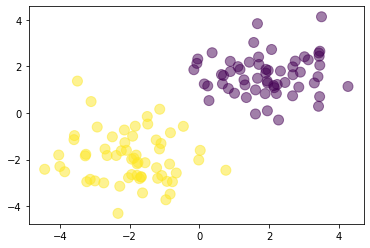

In [37]:
N = 120
D = 2
trainX = np.random.randn(N, D)

delta = 2
#trainX[:N//3] += np.array([delta, delta])
#trainX[N//3:N*2//3] += np.array([-delta, delta])
#trainX[N*2//3:] += np.array([0, -delta])


delta = 1.75
trainX[:N//2] += np.array([delta, delta])
trainX[N//2:] += np.array([-delta, -delta])

trainY = np.array([0] * (N//2) + [1] * (N//2))
plt.scatter(trainX[:,0], trainX[:,1], s=100, c=trainY, alpha=0.5)
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
from matplotlib import colors
from sklearn.utils.fixes import logsumexp


class NaiveBayesTF(BaseEstimator):
    
    def __init__(self):
        self.dist = None
        self.sess = tf.Session()

    def fit(self, trainX, trainY):
        # Separate training points by class (nb_classes * nb_samples * nb_features)
        unique_classes = np.unique(trainY)
        points_by_class = np.array([
            [x for x, y in zip(trainX, trainY) if y == c]
            for c in unique_classes])
        
        input_x = tf.placeholder(tf.float64, shape=points_by_class.shape)
        # 估计每个类底下每一种feature的均值和方差
        # shape: num_classes * nb_features
        
        moments = tf.nn.moments(input_x, axes=[1])
        mean, var = self.sess.run(moments, feed_dict={input_x:points_by_class})
        #print(mean.shape)
        #print(var.shape)
        
        # 点集实验里为2类，每个数据点有2个特征 
        # known mean and variance
        self.dist = tf.distributions.Normal(loc=mean, scale=tf.sqrt(var))
        

    def predict(self, testX):
        assert self.dist is not None
        num_classes, num_features = map(int, self.dist.scale.shape)

        # 条件概率 log P(x|c)
        # (nb_samples, nb_classes)
        cond_probs = tf.reduce_sum(
            self.dist.log_prob(
                tf.reshape(
                    tf.tile(testX, [1, num_classes]), [-1, num_classes, num_features])),
            axis=2)
        
        # 第一个点: 2.0,3.5
        # 第二个点: 0.5,1.4
        # tf.tile (num_classes = 2):
        # 第一个点: 2.0,3.5,2.0,3.5
        # 第二个点: 0.5,1.4,0.5,1.4
        # tf.reshape:
        # 第一个点: 2.0,3.5 
        #         2.0,3.5
        # 第二个点：0.5,1.4
        #         0.5,1.4

        # P(C) 均匀分布
        priors = np.log(np.array([1. / num_classes] * num_classes))

        # 后验概率取log, log P(C) + log P(x|C)
        posterior = tf.add(priors, cond_probs)
        
        # 取概率最大的那一个
        result = self.sess.run(tf.argmax(posterior, axis=1))

        return result
    
    
    def score(self, testX, testY):
        result = self.predict(testX)
        return accuracy_score(testY, result)


In [40]:
tf_nb = NaiveBayesTF()
tf_nb.fit(trainX, trainY)

W0927 12:58:51.943045 4712420800 deprecation.py:323] From <ipython-input-39-f27c92880cf9>:29: Normal.__init__ (from tensorflow.python.ops.distributions.normal) is deprecated and will be removed after 2019-01-01.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
W0927 12:58:51.945861 4712420800 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/distributions/normal.py:160: Distribution.__init__ (from tensorflow.python.ops.distributions.distribution) is deprecated and will be removed after 2019-01-01.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [41]:
x_min, x_max = trainX[:, 0].min() - .5, trainX[:, 0].max() + .5
y_min, y_max = trainX[:, 1].min() - .5, trainX[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

In [42]:
Z = tf_nb.predict(np.c_[xx.ravel(), yy.ravel()])

In [43]:
Z = Z.reshape(xx.shape)

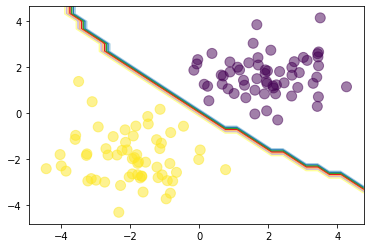

In [44]:
plt.scatter(trainX[:,0], trainX[:,1], s=100, c=trainY, alpha=0.5)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

In [45]:
tf_nb.score(trainX, trainY)

1.0

### Tensorflow实现random forest

In [46]:
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
import pandas as pd
import numpy as np
import os

In [47]:
data_folder = "./input/fashionmnist"
#data_folder = "./data"
train_data = pd.read_csv(os.path.join(data_folder, "fashion-mnist_train.csv"))
test_data = pd.read_csv(os.path.join(data_folder, "fashion-mnist_test.csv"))

In [48]:
trainX = np.array(train_data.iloc[:, 1:])
trainY = np.array(train_data.iloc[:, 0])
testX = np.array(test_data.iloc[:, 1:])
testY = np.array(test_data.iloc[:, 0])

In [49]:
IMAGE_CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

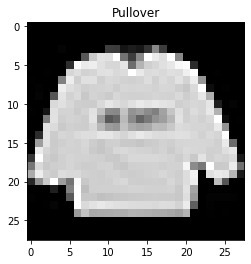

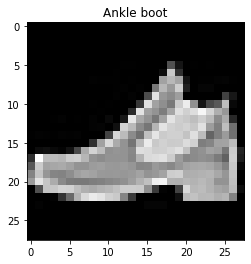

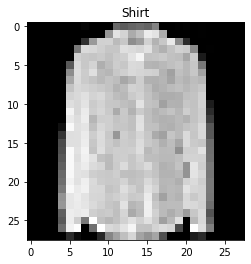

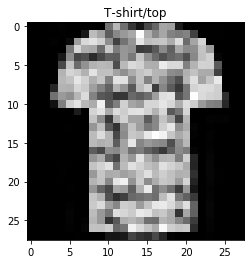

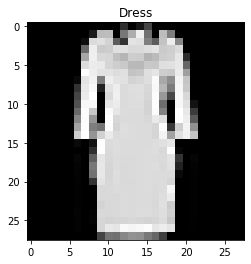

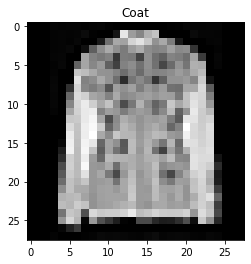

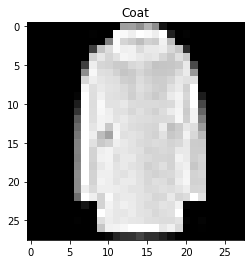

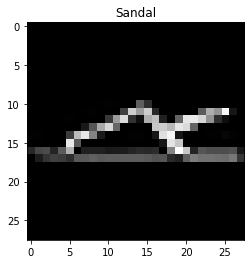

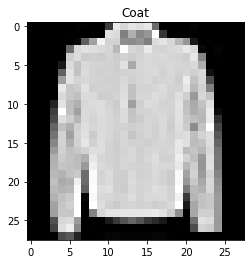

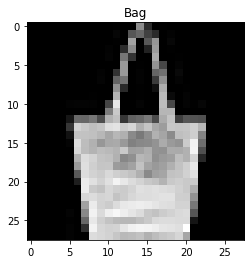

In [50]:
import matplotlib.pyplot as plt
img_size = 28
for img, label in zip(trainX[:10], trainY[:10]):
    plt.imshow(img.reshape(img_size,img_size),cmap='gray')
    plt.title(IMAGE_CLASSES[label])
    plt.show()

In [51]:
# 参数设定
#The 10 categories
#784 Each image is 28x28 pixels
num_steps = 100# Total steps to train
batch_size = 1024 # The number of samples per batch
num_trees = 10
max_nodes = 1000

In [52]:
tf.reset_default_graph()
class RandomForestTF(BaseEstimator):
    
    def __init__(self, num_trees):
        self.num_trees = num_trees
        
    def fit(self, X, Y, num_steps, batch_size,max_nodes):
        num_classes = 10   #len(IMAGE_CLASSES)
        num_data = X.shape[0]
        num_features = X.shape[1]
        
        self.X = tf.placeholder(tf.float32, shape=[None, num_features]) 
        self.Y = tf.placeholder(tf.int32, shape=[None]) 
        
        
        # 随机森林的参数
        hparams = tensor_forest.ForestHParams(num_classes=num_classes,
                                      num_features=num_features,
                                      num_trees=self.num_trees,
                                      max_nodes=max_nodes).fill()
        
        
        # 随机森林的计算图
        forest_graph = tensor_forest.RandomForestGraphs(hparams)
        
        train_operation = forest_graph.training_graph(self.X, self.Y)
        loss_operation = forest_graph.training_loss(self.X, self.Y)
        
        # inference_graph will return probabilities, decision path and variance
        self.infer_op, _, _ = forest_graph.inference_graph(self.X)
        correct_prediction = tf.equal(tf.argmax(self.infer_op, 1), tf.cast(self.Y, tf.int64))
        self.accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        
        # 将初始化的操作和树的参数初始化 作为一个整体操作
        init_vars = tf.group(tf.global_variables_initializer(),
                   resources.initialize_resources(resources.shared_resources()))
        #init_vars = tf.global_variables_initializer()
        
        self.sess = tf.Session()
        self.sess.run(init_vars)

        # 开始训练
        cnt = 0
        for i in range(1, num_steps + 1):
            # Prepare Data
            # 每次学习一个batch的MNIST data
            #batch_x, batch_y = training_set.next_batch(batch_size)
            start, end = ((i-1) * batch_size) % num_data, (i * batch_size) % num_data
            
            batch_x, batch_y = X[start:end], Y[start:end]
            _, l = self.sess.run([train_operation, loss_operation], feed_dict={self.X: batch_x, self.Y: batch_y})
            if i % 50 == 0 or i == 1:
                acc = self.sess.run(self.accuracy_op, feed_dict={self.X: batch_x, self.Y: batch_y})
                print('Step %i, Loss: %f, Acc: %f' % (i, l, acc))
                
    def predict(self, testX):
        results = self.sess.run(self.infer_op, feed_dict={self.X:testX})
        return np.argmax(results, axis=1)
    
    def score(self, testX, testY):
        accuracy = self.sess.run(self.accuracy_op, feed_dict={self.X: testX, self.Y: testY})
        return accuracy

In [53]:
rftf = RandomForestTF(num_trees)

In [54]:
rftf.fit(trainX, trainY, num_steps, batch_size, max_nodes)

W0927 12:59:36.838252 4712420800 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0927 12:59:37.041274 4712420800 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/contrib/tensor_forest/python/tensor_forest.py:529: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Step 1, Loss: -1.000000, Acc: 0.322266
Step 50, Loss: -254.800003, Acc: 0.821289
Step 100, Loss: -529.799988, Acc: 0.820312


In [55]:
rftf.score(testX, testY)

0.8138